In [ ]:
print("testing1")

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
train = pd.read_csv('sales_train.csv', parse_dates = ['date'], infer_datetime_format = True, dayfirst = True)
test = pd.read_csv('test.csv')
shops = pd.read_csv('shops.csv')
items = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')

# checking the shapes of these datasets
print("Shape of train:", train.shape)
print("Shape of test:", test.shape)
print("Shape of shops:", shops.shape)
print("Shape of items:", items.shape)
print("Shape of item_categories:", item_categories.shape)

Shape of train: (2935849, 6)
Shape of test: (214200, 3)
Shape of shops: (60, 2)
Shape of items: (22170, 3)
Shape of item_categories: (84, 2)


In [54]:
# head of the 
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [55]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [56]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [63]:
x = items.groupby(['item_category_id']).count()
x = x.sort_values(by = 'item_id', ascending = False)
x = x.reset_index()

c:\Users\edmun\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'Text' object has no property 'fontszie'

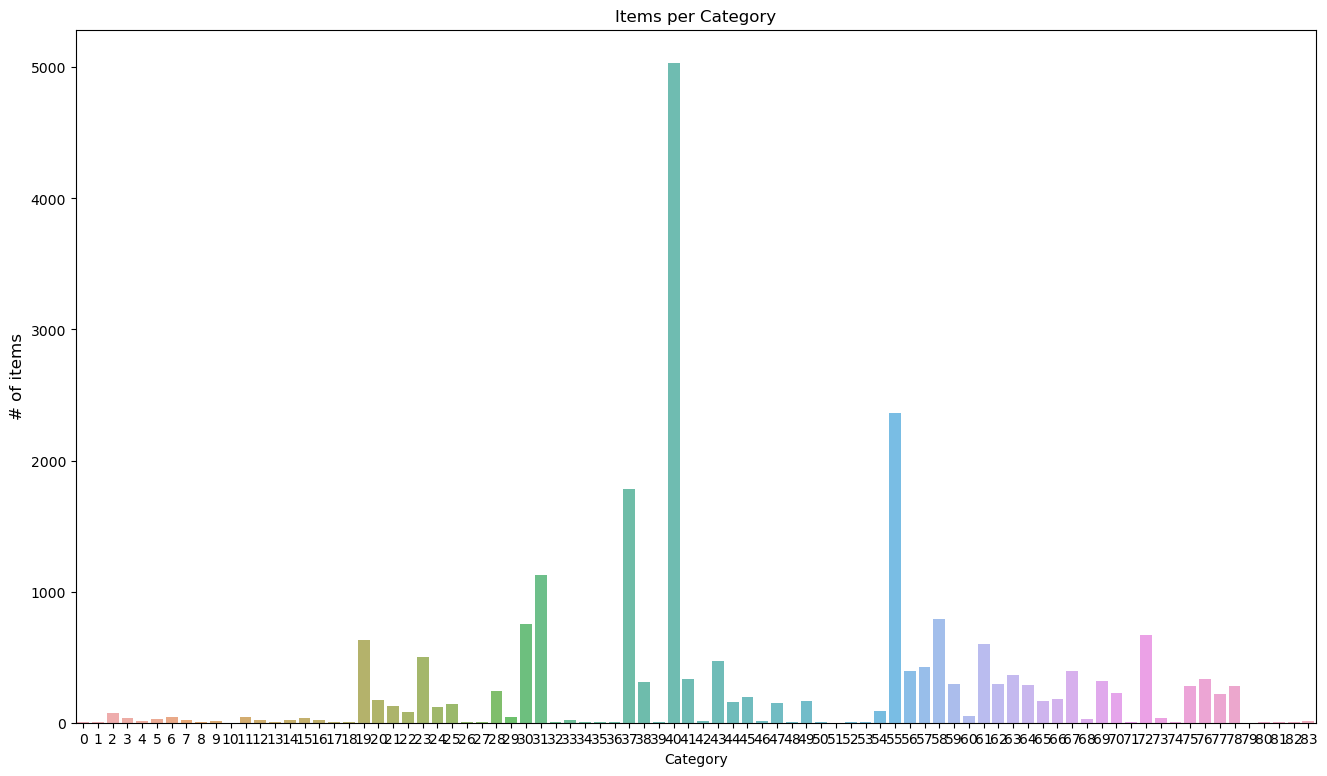

In [67]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x.item_category_id, x.item_id, alpha = 0.8)
plt.title('Items per Category')
plt.ylabel('# of items',fontsize = 12)
plt.xlabel('Category',fontszie = 12)
plt.show()

In [70]:
shops.sample(10)

,shop_name,shop_id
5,"Вологда ТРЦ ""Мармелад""",5
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
42,"СПб ТК ""Невский Центр""",42
19,"Курск ТЦ ""Пушкинский""",19
55,Цифровой склад 1С-Онлайн,55
27,"Москва ТЦ ""МЕГА Белая Дача II""",27
23,"Москва ТК ""Буденовский"" (пав.А2)",23
59,"Ярославль ТЦ ""Альтаир""",59
50,"Тюмень ТЦ ""Гудвин""",50
30,"Москва ТЦ ""Перловский""",30


In [71]:

shops.dtypes

shop_name    object
shop_id       int64
dtype: object

In [74]:
train.isnull().sum().sum()

0

In [75]:
# checking if there is any Null data inside the given data

print("No. of Null values in the train set :", train.isnull().sum().sum())
print("No. of Null values in the test set :", test.isnull().sum().sum())
print("No. of Null values in the item set :", items.isnull().sum().sum())
print("No. of Null values in the shops set :", shops.isnull().sum().sum())
print("No. of Null values in the item_categories set :", item_categories.isnull().sum().sum())

No. of Null values in the train set : 0
No. of Null values in the test set : 0
No. of Null values in the item set : 0
No. of Null values in the shops set : 0
No. of Null values in the item_categories set : 0


c:\Users\edmun\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


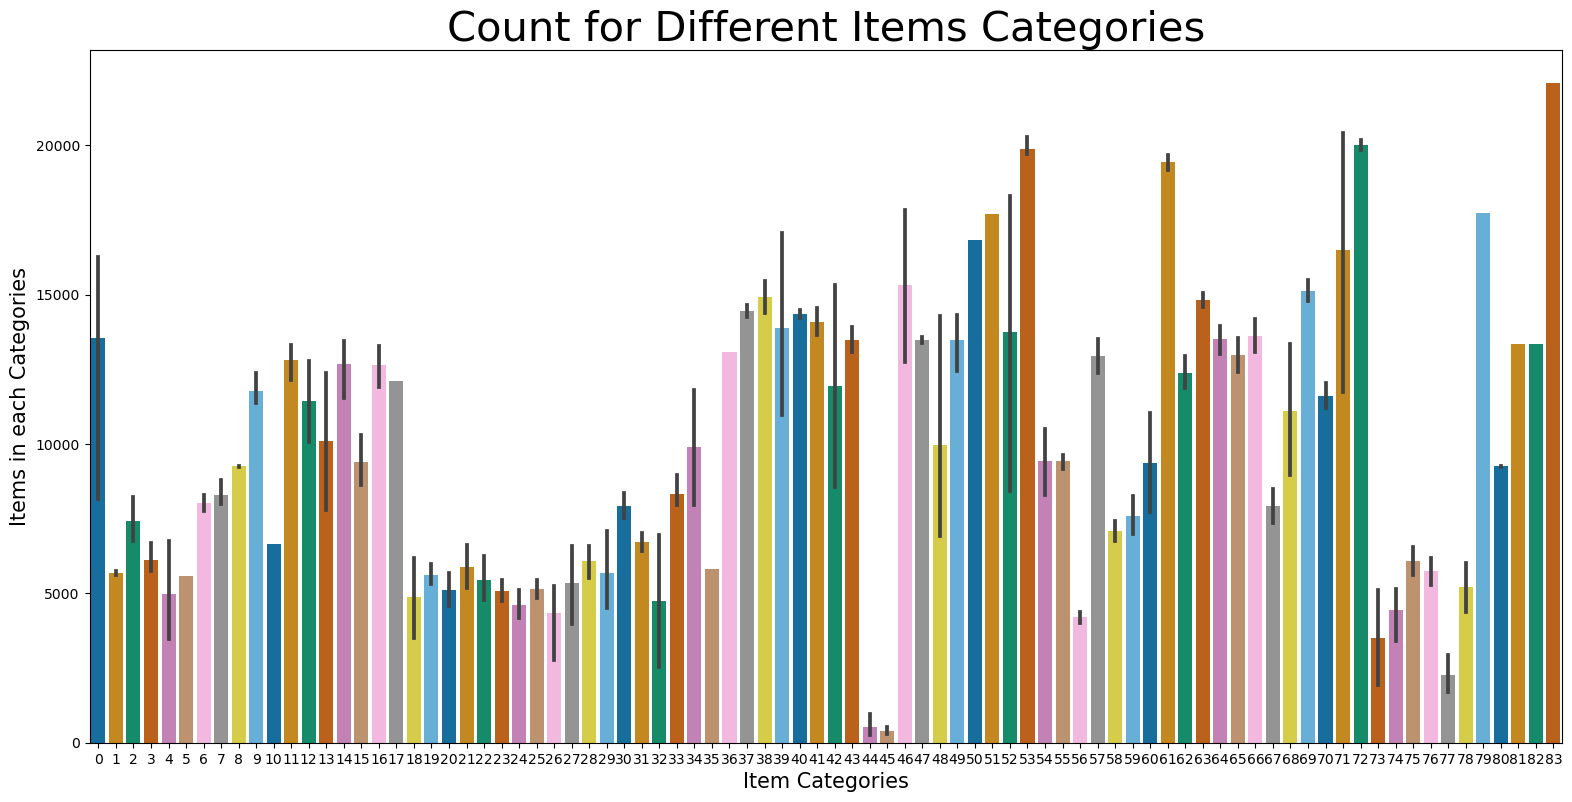

In [76]:
plt.rcParams['figure.figsize'] = (19, 9)
sns.barplot(items['item_category_id'], items['item_id'], palette = 'colorblind')
plt.title('Count for Different Items Categories', fontsize = 30)
plt.xlabel('Item Categories', fontsize = 15)
plt.ylabel('Items in each Categories', fontsize = 15)
plt.show()

c:\Users\edmun\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


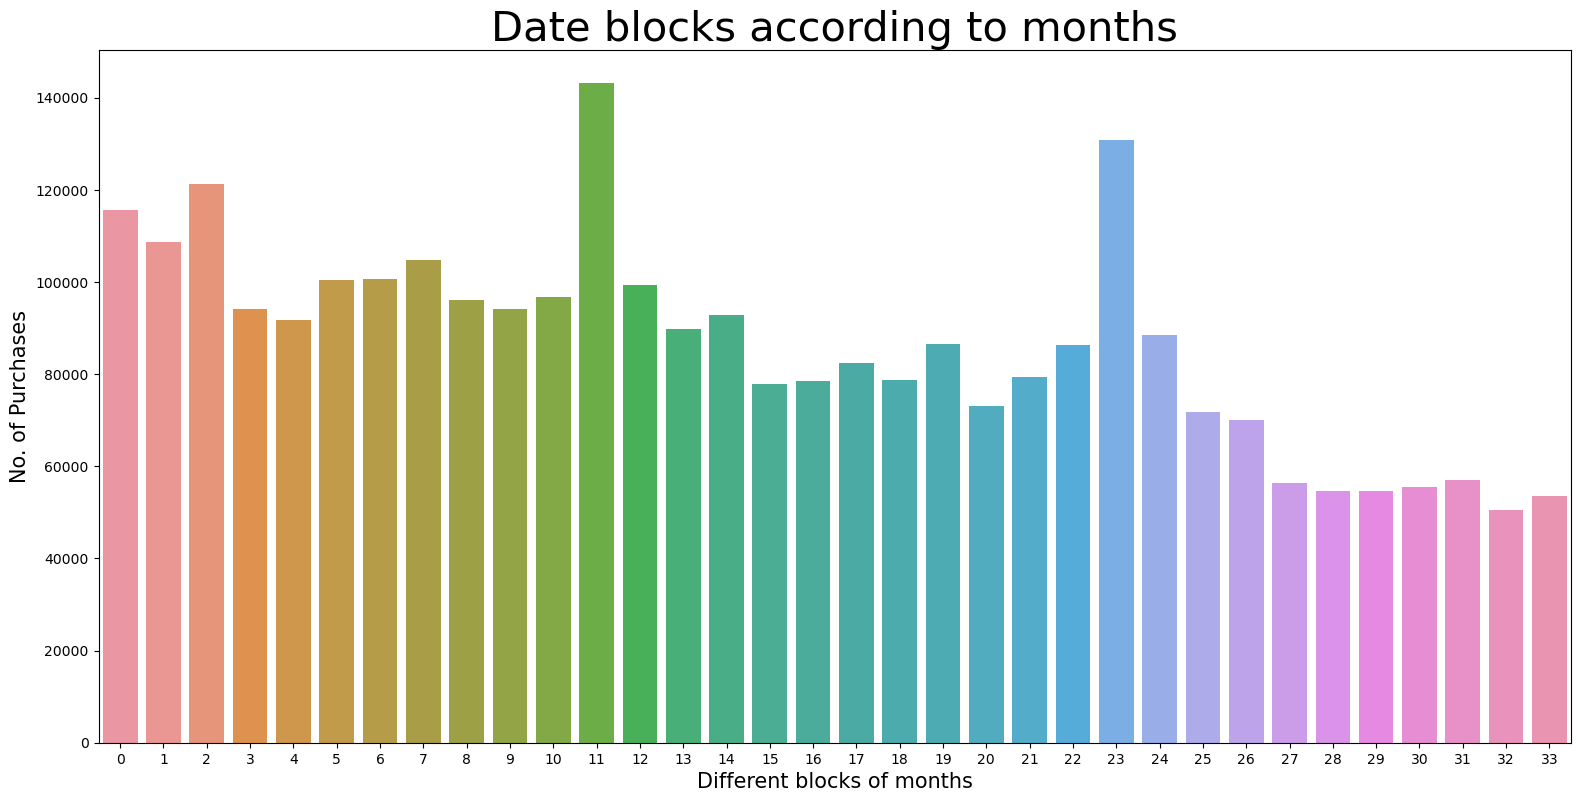

In [77]:
plt.rcParams['figure.figsize'] = (19, 9)
sns.countplot(train['date_block_num'])
plt.title('Date blocks according to months', fontsize = 30)
plt.xlabel('Different blocks of months', fontsize = 15)
plt.ylabel('No. of Purchases', fontsize = 15)
plt.show()

In [80]:
train.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
1,2013-01-03,0,25,2552,899.0,1.0


c:\Users\edmun\anaconda2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


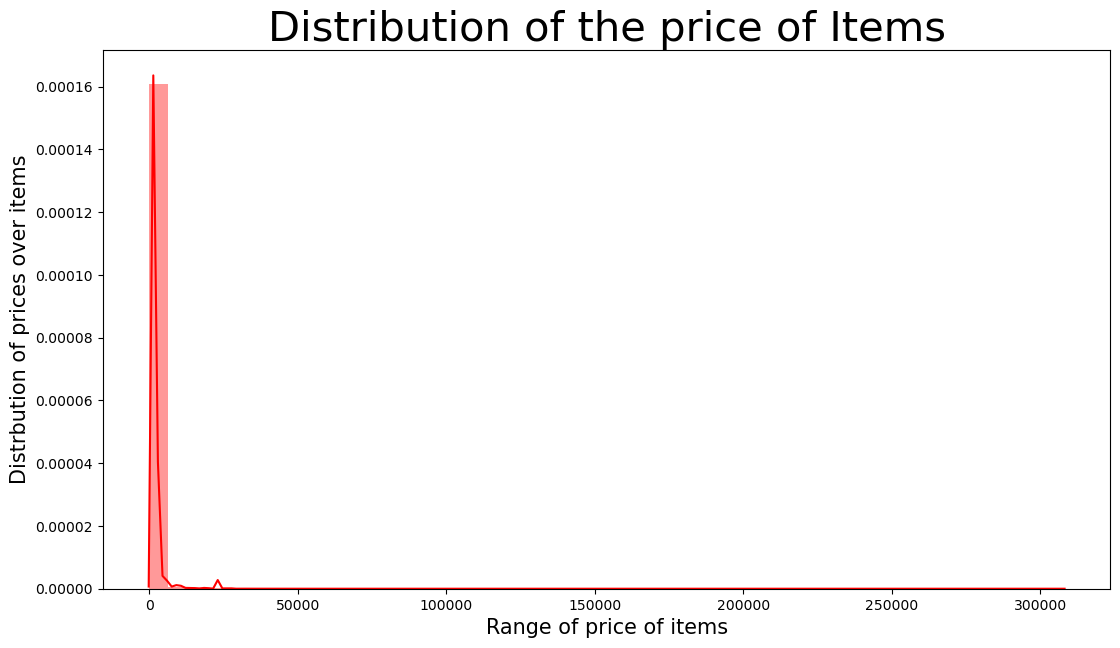

In [79]:
plt.rcParams['figure.figsize'] = (13, 7)
sns.distplot(train['item_price'], color = 'red')
plt.title('Distribution of the price of Items', fontsize = 30)
plt.xlabel('Range of price of items', fontsize = 15)
plt.ylabel('Distrbution of prices over items', fontsize = 15)
plt.show()

c:\Users\edmun\anaconda2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


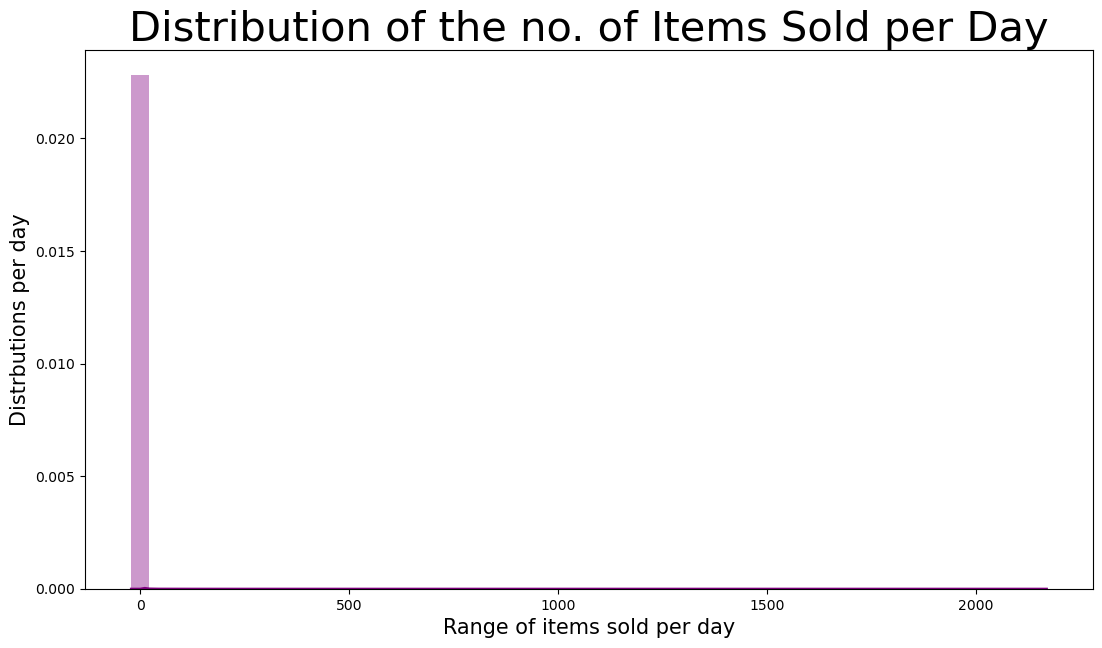

In [78]:
plt.rcParams['figure.figsize'] = (13, 7)
sns.distplot(train['item_cnt_day'], color = 'purple')
plt.title('Distribution of the no. of Items Sold per Day', fontsize = 30)
plt.xlabel('Range of items sold per day', fontsize = 15)
plt.ylabel('Distrbutions per day', fontsize = 15)
plt.show()

In [82]:
x = train['item_id'].nunique()
print("The No. of Unique Items Present in the stores available: ", x)
x = train['shop_id'].nunique()
print("No. of Unique Shops are :", x)

The No. of Unique Items Present in the stores available:  21807
No. of Unique Shops are : 60


In [84]:
# making a new column day
train['day'] = train['date'].dt.day

# making a new column month
train['month'] = train['date'].dt.month

# making a new column year
train['year'] = train['date'].dt.year

# making a new column week
train['week'] = train['date'].dt.week

# checking the new columns
train.columns

C:\Users\edmun\AppData\Local\Temp\ipykernel_24808\3888714929.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train['week'] = train['date'].dt.week


Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'day', 'month', 'year', 'week'],
      dtype='object')

c:\Users\edmun\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


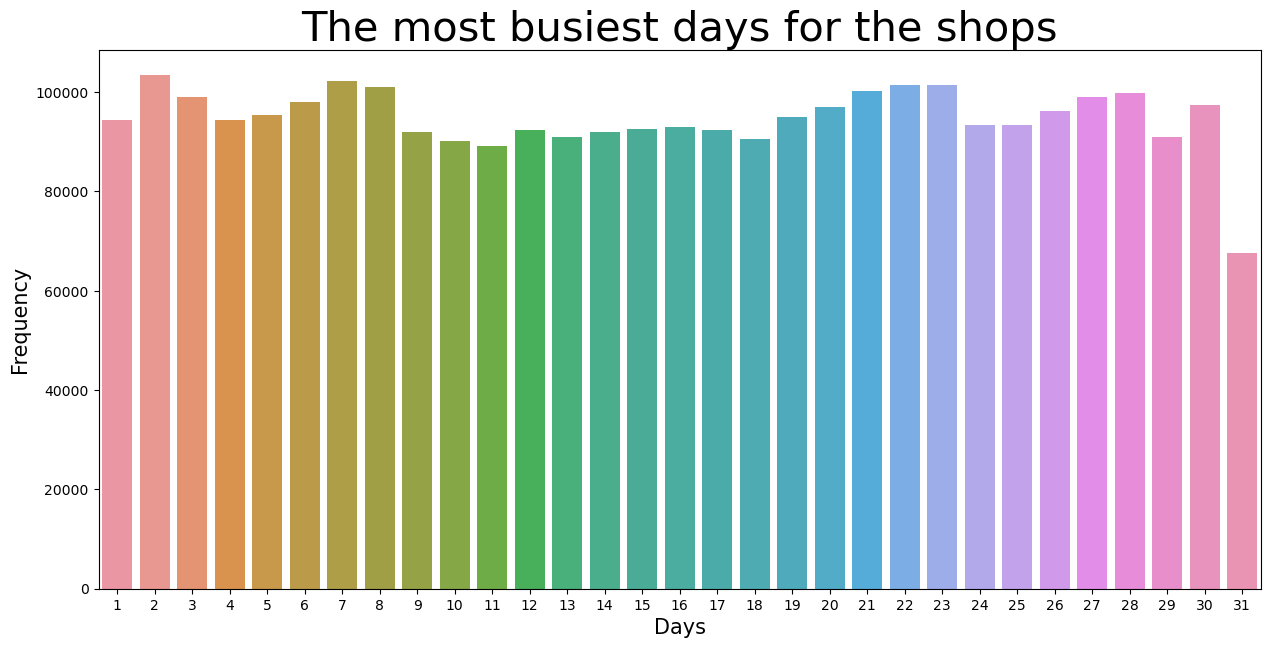

In [87]:
# checking which days are most busisiest for the shops
plt.rcParams['figure.figsize'] = (15,7)
sns.countplot(train['day'])
plt.title('The most busiest days for the shops', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

c:\Users\edmun\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


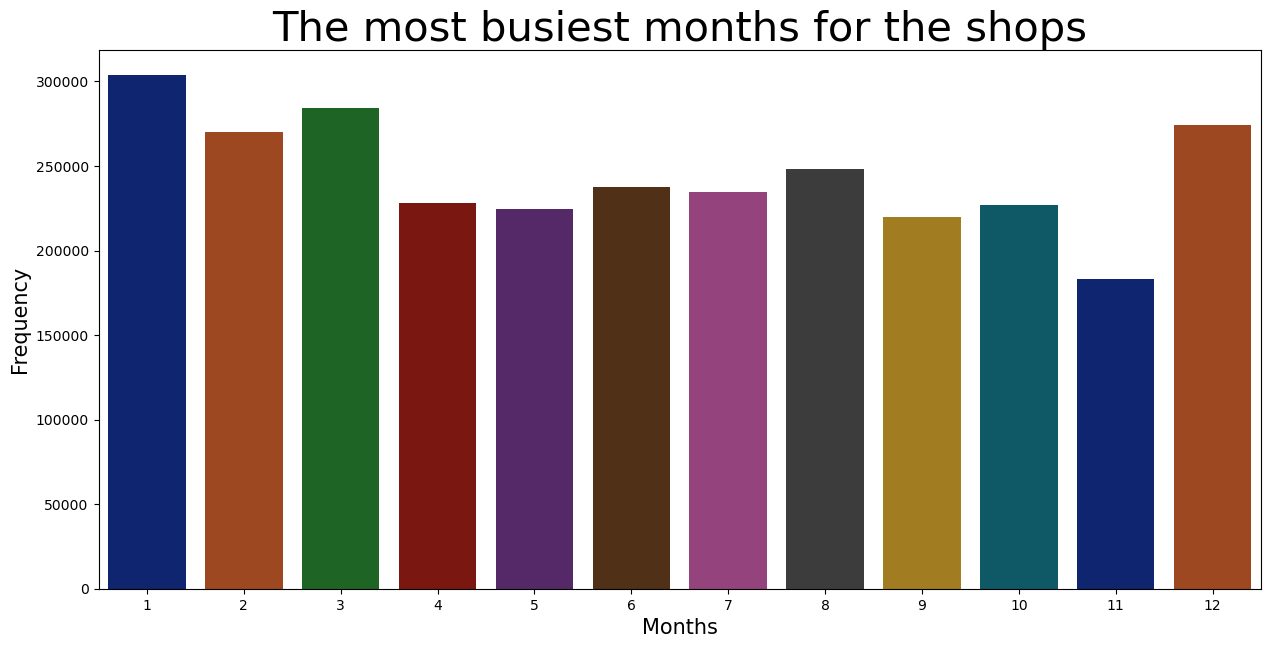

In [88]:
# checking which months are most busisiest for the shops

plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(train['month'], palette = 'dark')
plt.title('The most busiest months for the shops', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.show()

c:\Users\edmun\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


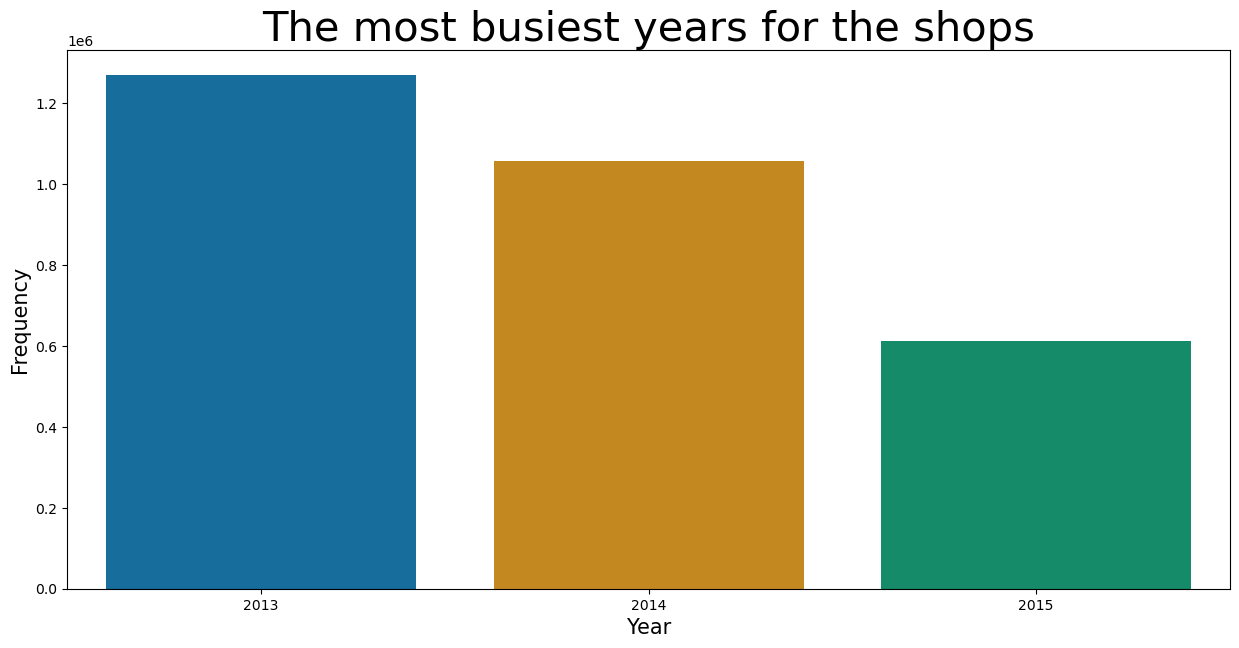

In [89]:
# checking which years are most busisiest for the shops

plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(train['year'], palette = 'colorblind')
plt.title('The most busiest years for the shops', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.show()

c:\Users\edmun\anaconda2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


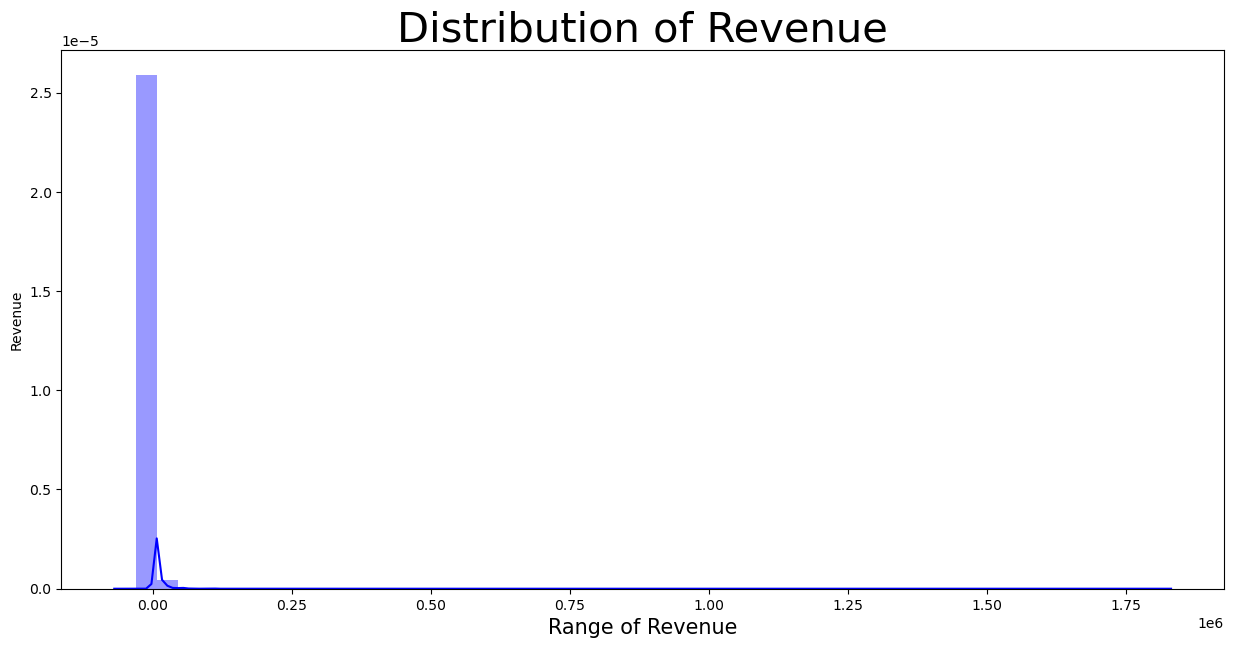

In [90]:
train['revenue'] = train['item_price'] * train['item_cnt_day']

sns.distplot(train['revenue'], color = 'blue')
plt.title('Distribution of Revenue', fontsize = 30)
plt.xlabel('Range of Revenue', fontsize = 15)
plt.ylabel('Revenue')
plt.show()

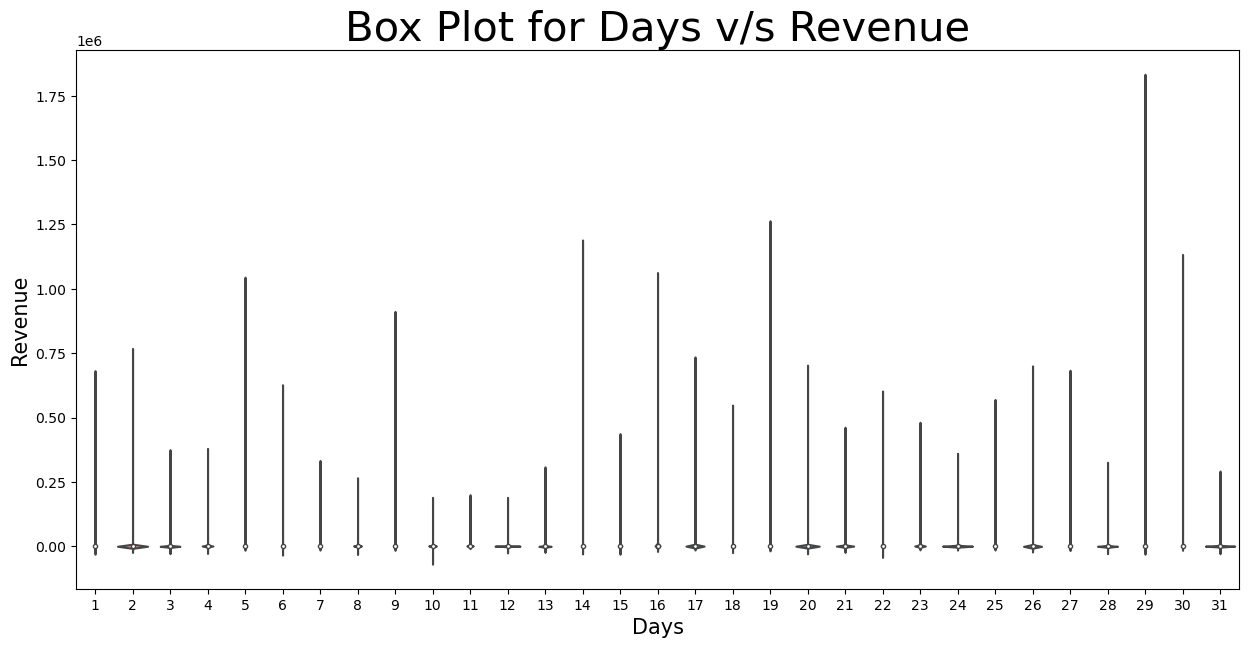

In [91]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.violinplot(x = train['day'], y = train['revenue'])
plt.title('Box Plot for Days v/s Revenue', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

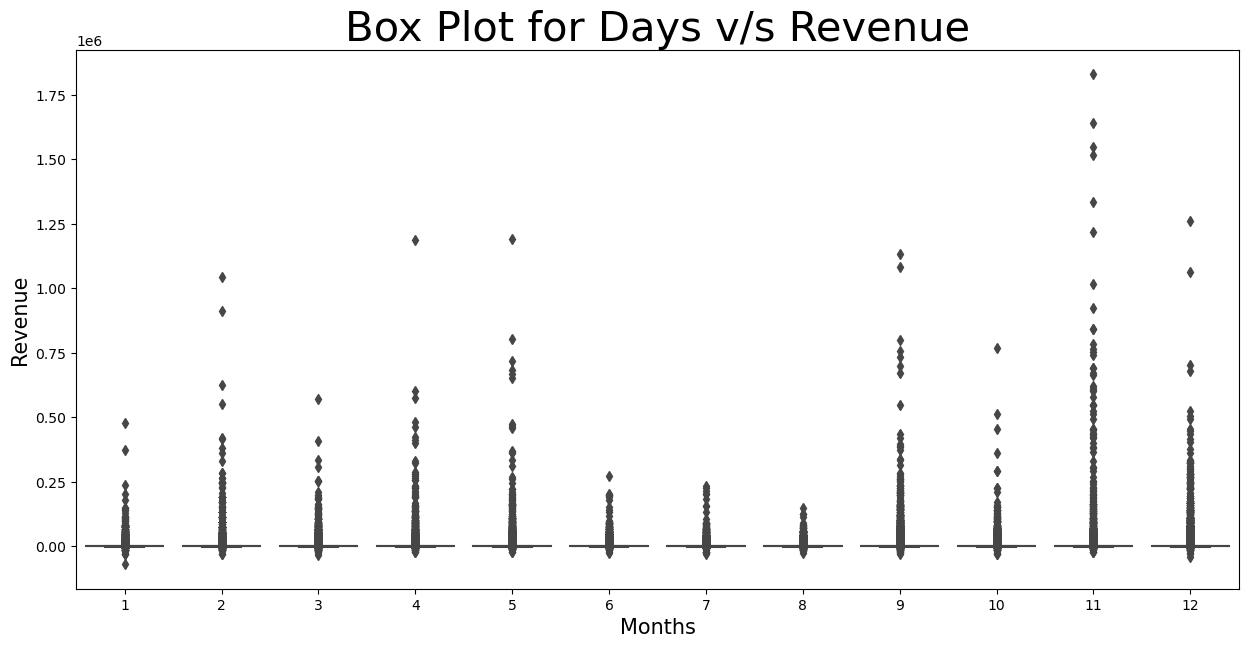

In [92]:
# plotting a box plot for itemprice and item-cnt-day

plt.rcParams['figure.figsize'] = (15, 7)
sns.boxplot(x = train['month'], y = train['revenue'])
plt.title('Box Plot for Days v/s Revenue', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

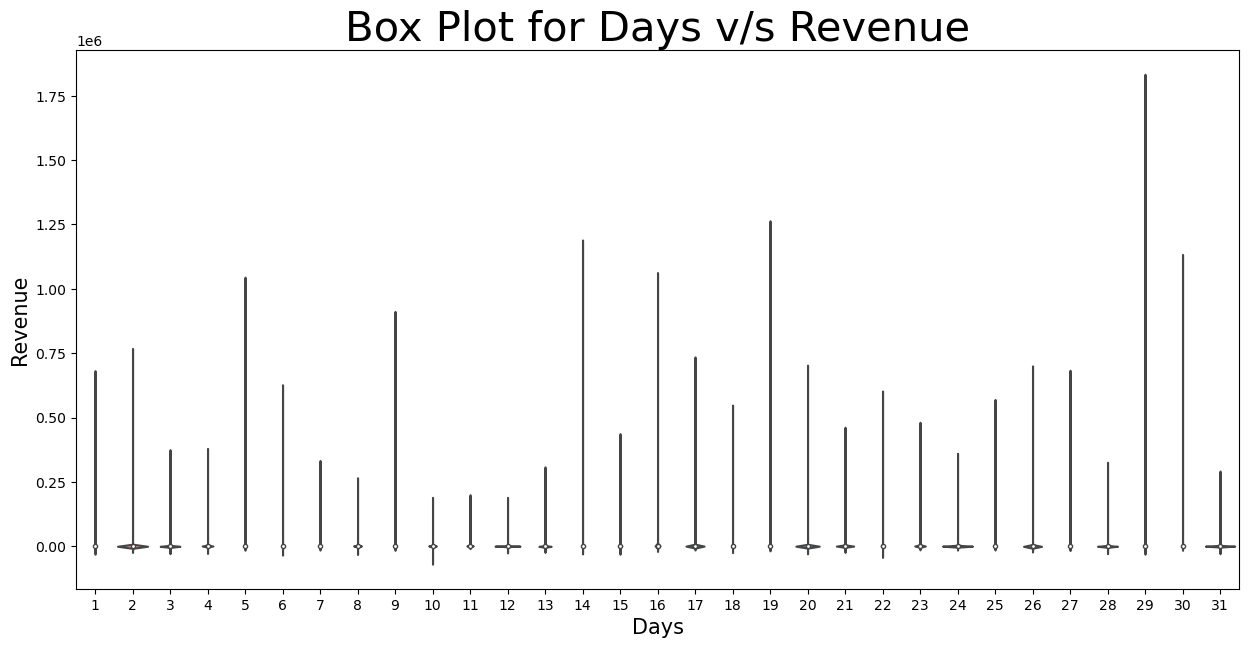

In [93]:
# plotting a box plot for itemprice and item-cnt-day

plt.rcParams['figure.figsize'] = (15, 7)
sns.violinplot(x = train['day'], y = train['revenue'])
plt.title('Box Plot for Days v/s Revenue', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

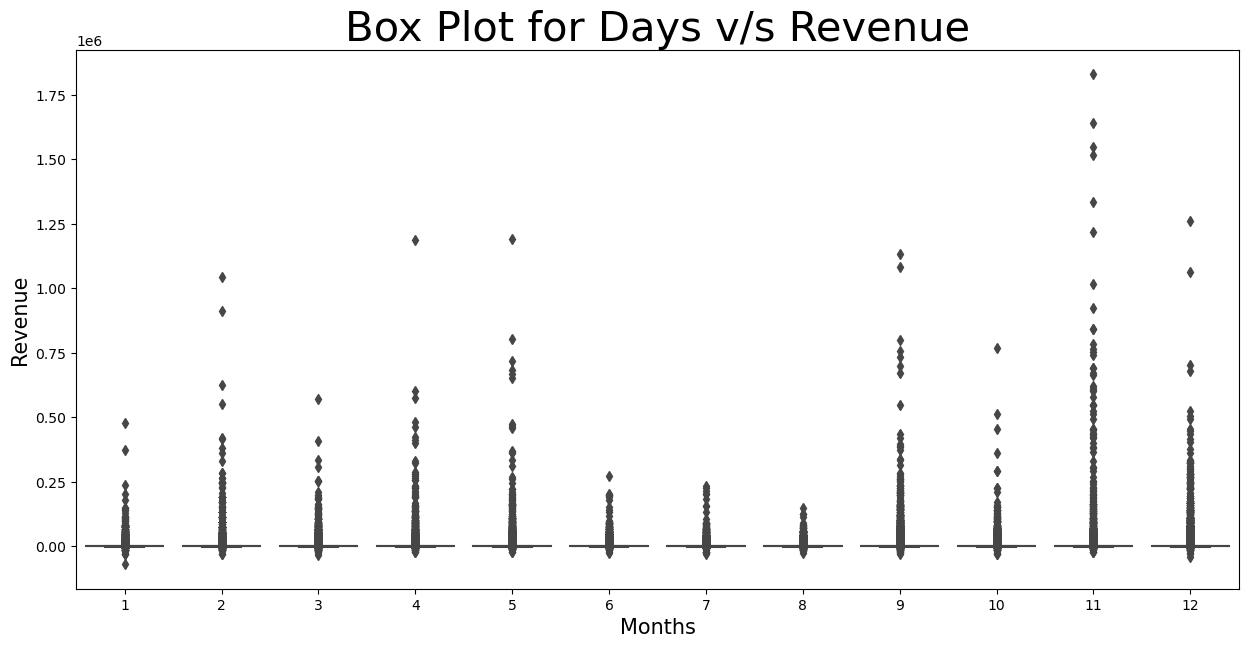

In [94]:
# plotting a box plot for itemprice and item-cnt-day

plt.rcParams['figure.figsize'] = (15, 7)
sns.boxplot(x = train['month'], y = train['revenue'])
plt.title('Box Plot for Days v/s Revenue', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

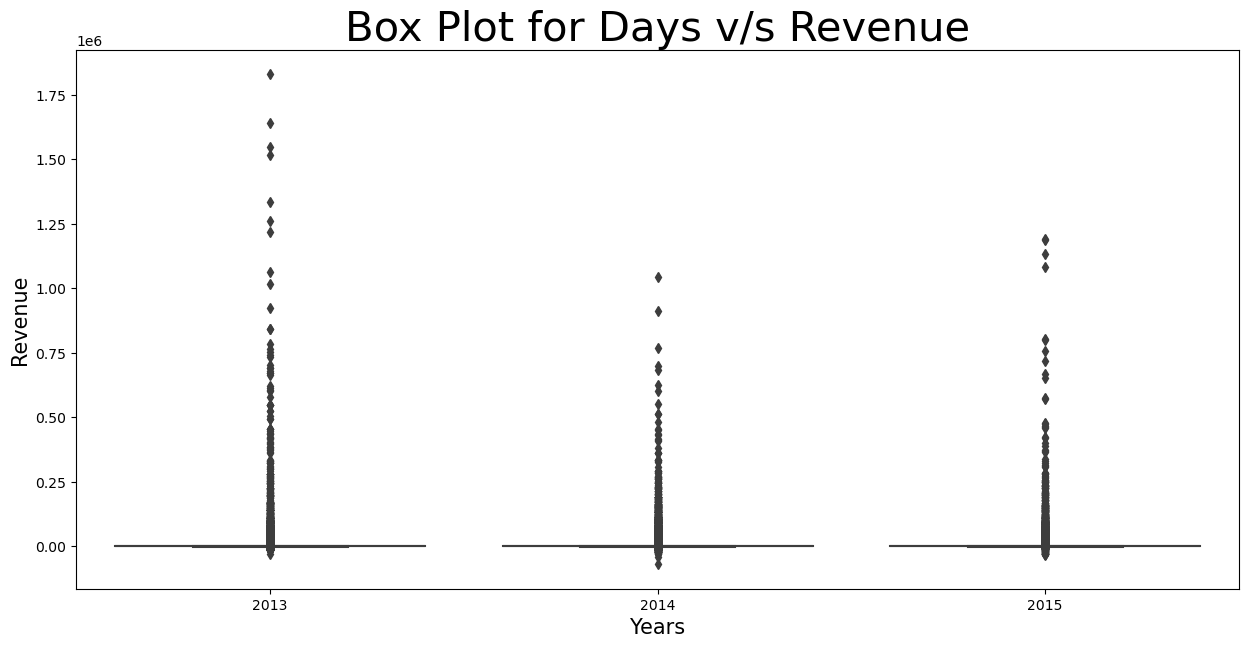

In [95]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.boxplot(x = train['year'], y = train['revenue'])
plt.title('Box Plot for Days v/s Revenue', fontsize = 30)
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

In [96]:
# converting the data into monthly sales data

# making a dataset with only monthly sales data
data = train.groupby([train['date'].apply(lambda x: x.strftime('%Y-%m')),'item_id','shop_id']).sum().reset_index()

# specifying the important attributes which we want to add to the data
data = data[['date','item_id','shop_id','item_cnt_day']]

# at last we can select the specific attributes from the dataset which are important 
data = data.pivot_table(index=['item_id','shop_id'], columns = 'date', values = 'item_cnt_day', fill_value = 0).reset_index()

# looking at the newly prepared datset
data.shape

(424124, 36)

In [97]:
# let's merge the monthly sales data prepared to the test data set

test = pd.merge(test, data, on = ['item_id', 'shop_id'], how = 'left')

# filling the empty values found in the dataset
test.fillna(0, inplace = True)

# checking the dataset
test.head()

,ID,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
# now let's create the actual training data

x_train = test.drop(['2015-10', 'item_id', 'shop_id'], axis = 1)
y_train = test['2015-10']

# deleting the first column so that it can predict the future sales data
x_test = test.drop(['2013-01', 'item_id', 'shop_id'], axis = 1)

# checking the shapes of the datasets
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_train.shape)

Shape of x_train : (214200, 34)
Shape of x_test : (214200, 34)
Shape of y_test : (214200,)


In [3]:
a=pd.Series([13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70])

In [6]:
len(a)

27

In [9]:
b= a.sort_values()

In [26]:
b


0     13
1     15
2     16
3     16
4     19
5     20
6     20
7     21
8     22
9     22
12    25
13    25
10    25
11    25
14    30
15    33
16    33
17    35
18    35
19    35
20    35
21    36
22    40
23    45
24    46
25    52
26    70
dtype: int64

In [20]:
df = pd.DataFrame(a)

In [25]:
df.describe()

,0
count,27.000000
mean,29.962963
std,12.942124
min,13.000000
25%,20.500000
50%,25.000000
75%,35.000000
max,70.000000
